# INTRODUCTION

Heart disease is one of the leading causes of death worldwide, affecting millions of people and placing a significant burden on healthcare systems. According to the Centers for Disease Control and Prevention (CDC), heart disease accounts for approximately 647,000 deaths per year in the United States alone. The key risk factors include high blood pressure, high cholesterol, smoking, diabetes, poor dietary habits, and lack of physical activity. Identifying individuals at risk early can help in taking preventive measures and improving patient outcomes.

This project focuses on building a machine learning model to predict the likelihood of a patient having heart disease or experiencing a heart attack based on various health indicators. The dataset used for this study contains information on key health metrics such as BMI, smoking status, diabetes, physical and mental health status, and demographic factors like age, sex, income, and education level.

**The primary objectives of this project are:**



*   To develop and evaluate machine learning models that can accurately predict
heart disease risk.

* To identify the most influential factors contributing to heart disease.

* To use precision-recall analysis to determine the best classification threshold.

* To explore techniques such as oversampling and undersampling to handle class imbalance.

Through comprehensive exploratory data analysis, feature engineering, and model evaluation, this study aims to provide valuable insights into heart disease prediction and contribute to data-driven healthcare decision-making.

# KEY FINDINGS

### **1. Introduction**
This project presents an analysis of heart disease classification using machine learning models. The study aims to identify key factors contributing to heart disease, address class imbalance, and determine the most effective classification model.

### **2. Importing Libraries and Loading Dataset**
Essential Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn were imported to facilitate data handling, visualization, and modeling. The dataset was loaded and checked for missing values and inconsistencies.

### **3. Exploratory Data Analysis (EDA)**
#### **Univariate Analysis**
- Distribution of continuous variables was examined using histograms and boxplots.
- Categorical variables were analyzed through bar plots.

#### **Multivariate Analysis**
- Correlation heatmaps were used to explore relationships among features.
- Target variable (Heart Disease or Attack) was analyzed for imbalances.

#### **Feature Engineering**
- No strong interactions warranted the creation of new features.

### **4. Binary Classification Experimentation**
A variety of classification models were tested:
- Random Forest
- Gradient Boosting
- Logistic Regression
- AdaBoost
- Bagging
- Extra Tree

### **5. Threshold Tuning using Precision-Recall Curves**
Precision-recall curves were used to identify the optimal decision threshold, balancing sensitivity and specificity.

### **6. Model Performance Comparison**
All models were evaluated using a hold-out test dataset. Performance metrics included:
- Accuracy
- Precision
- Recall

### **7. Addressing Class Imbalance**
The dataset exhibited class imbalance. This affected model performance. To solve the class imbalance problem,  Oversampling (Synthetic Minority Over-sampling Technique - SMOTE) was adopted

### **8. Key Drivers of Heart Disease**
Feature importance analysis identified:
- High Blood Pressure
- Cholesterol Levels
- BMI
- Smoking Status
- Mental Health
- Physical Health
- Sex
- Age
- Income

### **9. Classifiers' Performance**
The initial classifiers trained on imbalanced data demonstrate a high accuracy but often poor recall for the minority class (HeartDiseaseorAttack = 1). This suggests the models learned to predict the majority class well but failed to correctly identify heart disease cases. The application of SMOTE (Synthetic Minority Oversampling Technique) significantly improved the performance of all classifiers by balancing the class distribution.
After balancing the dataset, we can see a substantial increase in the recall score for minority class, indicating improved ability to identify heart disease cases.


### **10. Conclusion**
The study highlights the impact of class imbalance on model performance and the effectiveness of resampling techniques. Precision-recall analysis guided optimal decision threshold selection. Feature importance analysis identified key contributors to heart disease, enabling more targeted prevention strategies. The final pipeline ensures seamless deployment and inference for real-world applications.



# Importing Libraries

In [105]:
# To Handle the Data

import pandas as pd # For loading, cleaning, and manipulating the dataset (handling missing values, filtering, grouping, etc.)
import numpy as np  # For performing mathematical computations.

# For Data Viusalization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve


from sklearn.feature_selection import SelectKBest, chi2  # For feature selection

from imblearn.over_sampling import SMOTE


# Importing the Health Disease Data Set

In [106]:
data = pd.read_csv('heartdisease.csv')   # Loading the heart disease dataset from a CSV file
data.head(3)                             # Display the first 3 rows of the dataframe.
#data.tail(3)                             # Display the last 3 rows of the dataframe.

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,40,1,0,0,0,1,0,18,15,0,9,4,3
1,0,0,0,25,1,0,1,0,0,0,0,0,0,7,6,1
2,0,1,1,28,0,0,0,1,0,0,30,30,0,9,4,8


The dataset contains one binary response variable: HeartDiseaseorAttack and 15 feature or explanatory variables that were either binary or ordinal but have been encoded into numeric.



# Exploratory Data Analysis (EDA)

In [107]:
# 1. Exploring the data type of each column

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Diabetes              253680 non-null  int64
 6   PhysActivity          253680 non-null  int64
 7   Fruits                253680 non-null  int64
 8   Veggies               253680 non-null  int64
 9   HvyAlcoholConsump     253680 non-null  int64
 10  MentHlth              253680 non-null  int64
 11  PhysHlth              253680 non-null  int64
 12  Sex                   253680 non-null  int64
 13  Age                   253680 non-null  int64
 14  Education             253680 non-null  int64
 15  Income                253680 non-n

The data.info() output shows a Pandas DataFrame with 253,680 entries and 16 columns. All columns are of integer (int64) data type, indicating that all features are numerical. There are no missing values (Non-Null Count matches the total number of entries for each column). The DataFrame occupies approximately 31.0 MB of memory.  

In [108]:
# Checking for Missing Values

data.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
BMI,0
Smoker,0
Diabetes,0
PhysActivity,0
Fruits,0
Veggies,0
HvyAlcoholConsump,0


In [109]:
 # 2. Checking the data shape

data.shape

(253680, 16)

In [110]:
# Checking column names

data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

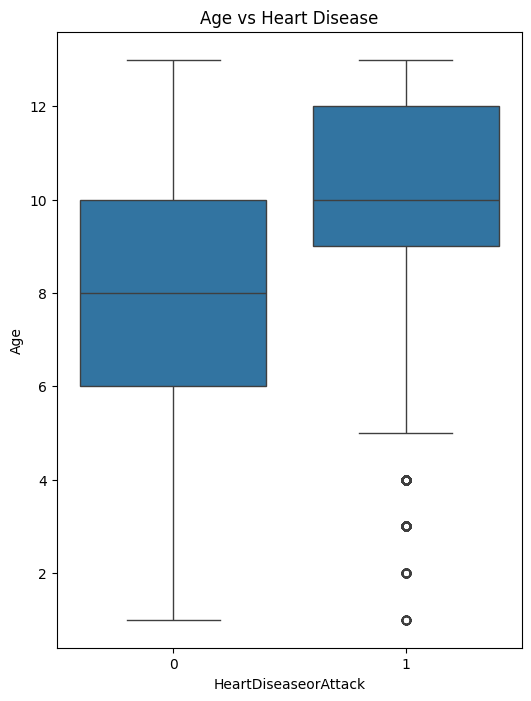

In [111]:
# Age distribution for Target Variable
plt.figure(figsize=(6, 8))
sns.boxplot(x='HeartDiseaseorAttack', y='Age', data= data)
plt.title('Age vs Heart Disease')
plt.show()

This boxplot shows the age distribution for individuals with and without heart disease.
The median age is higher for those with heart disease compared to those without.
There is a larger spread of ages for individuals without heart disease.
The presence of outliers suggests that some younger individuals also develop heart disease.


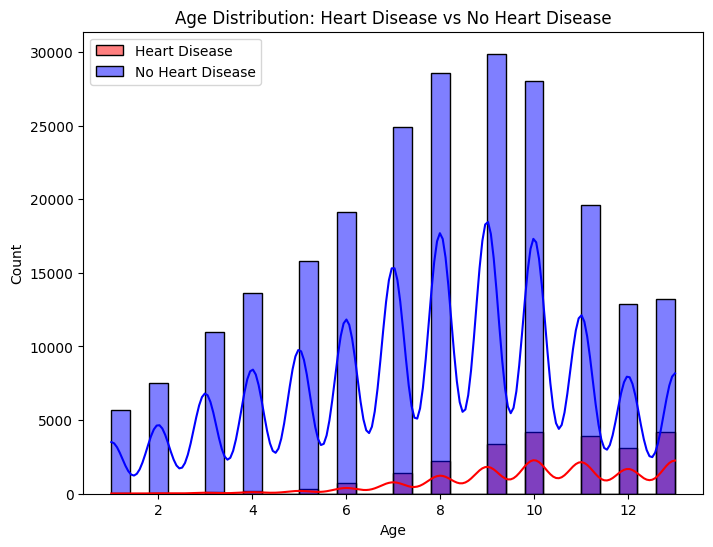

In [112]:
# Distribution of Age for Heart Disease vs No Disease
plt.figure(figsize=(8, 6))
sns.histplot(data[data['HeartDiseaseorAttack'] == 1]['Age'], color='red', label='Heart Disease', kde=True, bins=30)
sns.histplot(data[data['HeartDiseaseorAttack'] == 0]['Age'], color='blue', label='No Heart Disease', kde=True, bins=30)
plt.title('Age Distribution: Heart Disease vs No Heart Disease')
plt.legend()
plt.show()

This histogram with a density curve compares age distribution for individuals with and without heart disease.
The blue bars and line represent those without heart disease, while the red bars and line represent those with heart disease.
Most people in the dataset appear to be in the middle-age range, with fewer young or very old individuals.
The number of heart disease cases (red bars) seems to increase with age, indicating a correlation between age and heart disease.
The density curves show oscillations, possibly due to rounding of ages in the dataset.

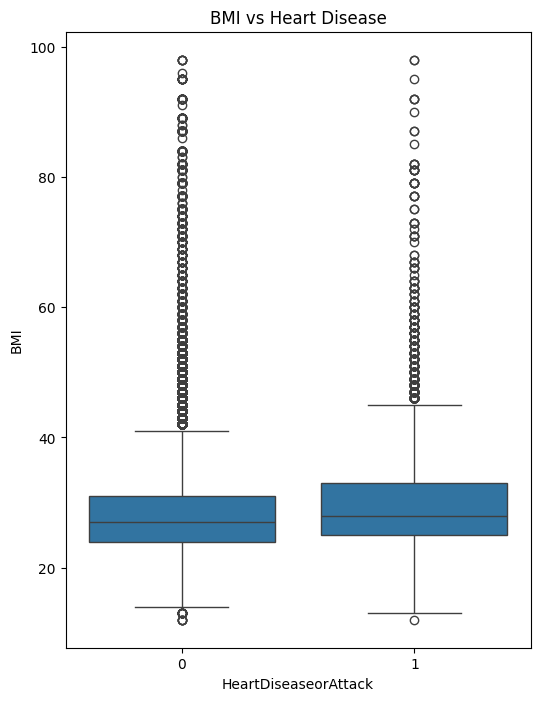

In [113]:
# Boxplot of BMI vs Heart Disease

plt.figure(figsize=(6, 8))
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=data)
plt.title('BMI vs Heart Disease')
plt.show()

The boxplot compares Body Mass Index (BMI) between individuals who have heart disease (1) and those who do not (0).
The median BMI is slightly higher for individuals with heart disease.
Both groups have a similar spread of BMI values, with many outliers above 40, indicating extreme BMI values.
The distribution appears right-skewed, suggesting that a few individuals have very high BMI values.


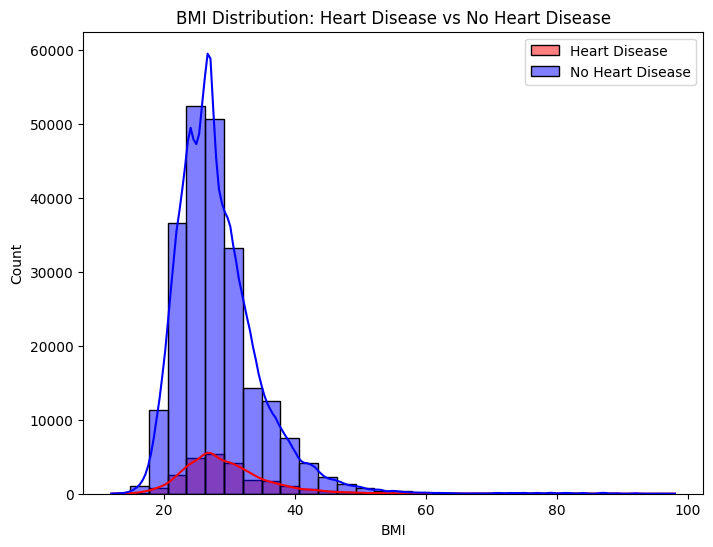

In [114]:
# BMI distribution for Heart Disease vs No Disease
plt.figure(figsize=(8, 6))
sns.histplot(data[data['HeartDiseaseorAttack'] == 1]['BMI'], color='red', label='Heart Disease', kde=True, bins=30)
sns.histplot(data[data['HeartDiseaseorAttack'] == 0]['BMI'], color='blue', label='No Heart Disease', kde=True, bins=30)
plt.title('BMI Distribution: Heart Disease vs No Heart Disease')
plt.legend()
plt.show()

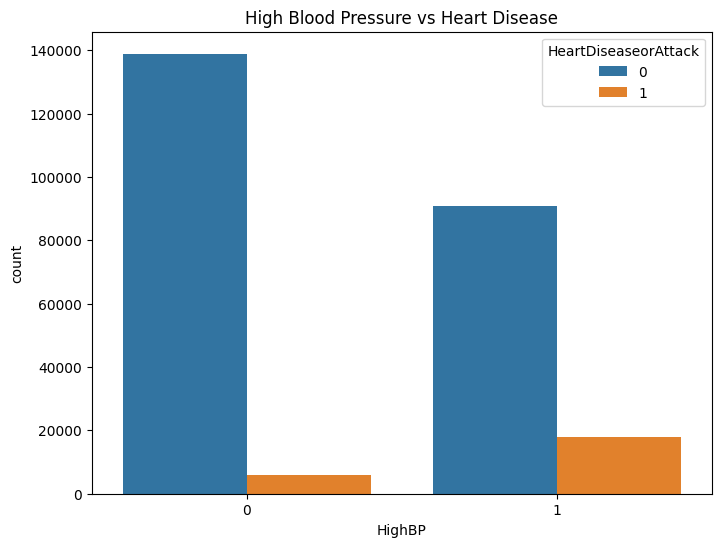

In [115]:
# Check the distribution of HighBP in Heart Disease vs No Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=data)
plt.title('High Blood Pressure vs Heart Disease')
plt.show()

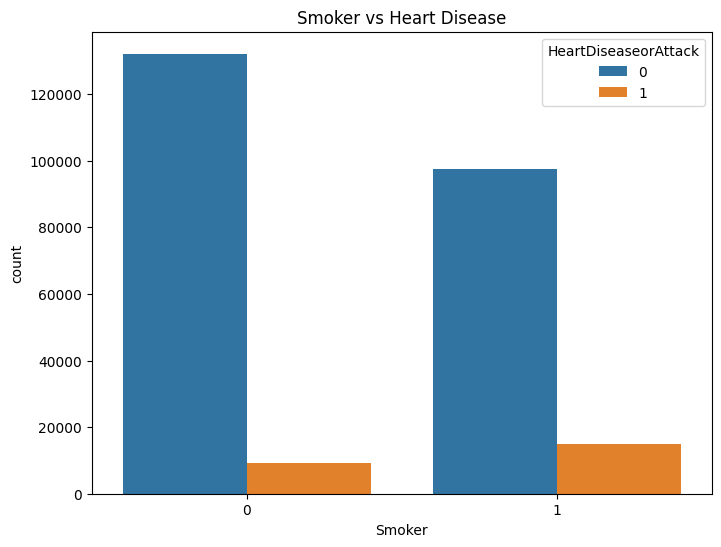

In [116]:
# Smoking vs Heart Disease

plt.figure(figsize=(8, 6))
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=data)
plt.title('Smoker vs Heart Disease')
plt.show()

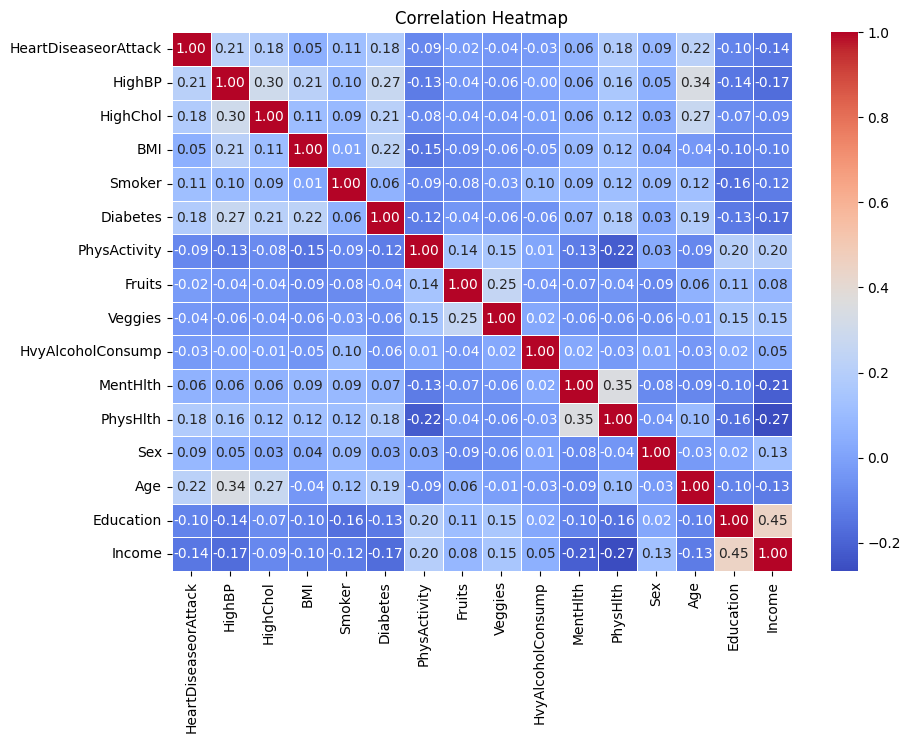

In [117]:
# Correlation matrix for numerical Variables

plt.figure(figsize=(10, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

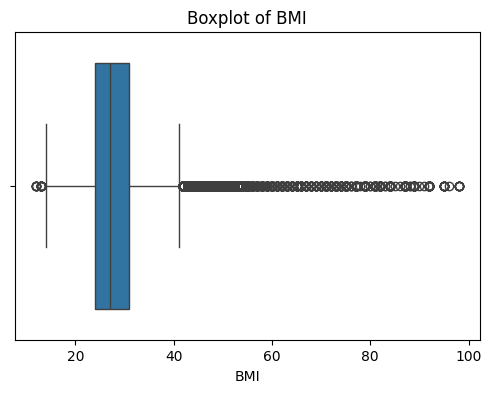

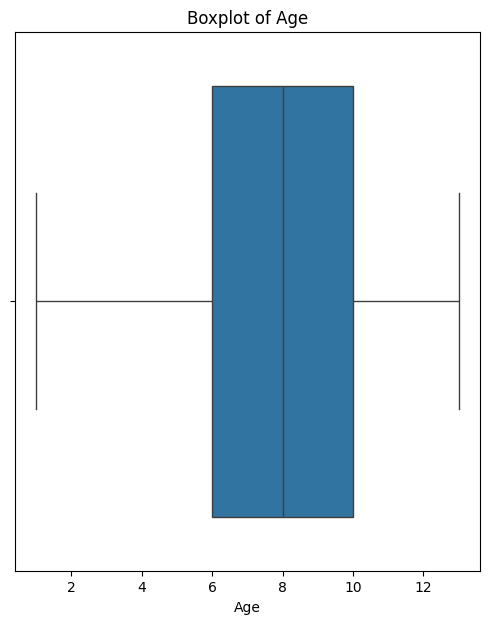

In [118]:
# Outlier Detection

# Boxplot to identify outliers in BMI
plt.figure(figsize=(6, 4))
sns.boxplot(x='BMI', data= data)
plt.title('Boxplot of BMI')
plt.show()

# Boxplot to identify outliers in Age
plt.figure(figsize=(6, 7))
sns.boxplot(x='Age', data= data)
plt.title('Boxplot of Age')
plt.show()

In [119]:
# Removing outliers in BMI and Age using IQR

Q1_BMI = data['BMI'].quantile(0.25)
Q3_BMI = data['BMI'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI
lower_bound_BMI = Q1_BMI - 1.5 * IQR_BMI
upper_bound_BMI = Q3_BMI + 1.5 * IQR_BMI
df = data[(data['BMI'] >= lower_bound_BMI) & (data['BMI'] <= upper_bound_BMI)]

# Similarly for Age
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age
df = df[(df['Age'] >= lower_bound_Age) & (df['Age'] <= upper_bound_Age)]

In [120]:
# Summary Statistics

# Using describe() function to get an overview of numerical features

# First select the numeric columns using indexing and apply describe()
data[["BMI", "MentHlth", "PhysHlth"]].describe()




,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


The results show the following:
* the average BMI is 28.38. This could suggest overweight or obese individuals are prevalent.  Average mental health score is 3.18 and physical health is 4.24.

* the BMI has a standard deviation of 6.61, indicating moderate variability in BMI values.  The high standard deviation for Mental Health (7.41) and Physical Health (8.72) suggests a wider spread of these scores in the dataset.

* the minimum BMI is 12, which could be considered underweight, while the maximum is 98, which is extremely high and likely an outlier or data error. The mental and physical health range from 0 to 30.

* the Percentiles (25%, 50%, 75%) represent the quartiles. 50% of individuals have a BMI of 27 or less. The large number of zeros in the 25th and 50th percentiles for mental and physical health suggest many people report no symptoms in those areas.  75% of individuals have a BMI of 31 or less, a mental health score of 2 or less and physical health score of 3 or less.

In [121]:
# Target vrs Features

X = data.drop('HeartDiseaseorAttack', axis=1)   # Features
print(X.shape)

y = data['HeartDiseaseorAttack']  # Target variable
print(y.shape)

(253680, 15)
(253680,)


# Splitting Data into train and test set

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)
print(X_train.shape)  # Prints the shape of the training feature set
print(X_test.shape)   # Prints the shape of the testing feature set
print(y_train.shape)  # Prints the shape of the training target variable set
print(y_test.shape)   # Prints the shape of the testing target variable set

(177576, 15)
(76104, 15)
(177576,)
(76104,)


The test_size = 0.3 parameter specifies that 30% of the data should be used for testing, while the remaining 70% will be used for training. The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the trained model on unseen data. The random_state = 10 parameter sets a seed for the random number generator. By specifying a random_state, we ensure that the data split is reproducible.  If the code is run multiple times with the same random_state, you will get the same training and testing sets.

# Feature Selection

In [123]:
# Feature Selection
optimal_features = SelectKBest(chi2, k=10)
X_selected = optimal_features.fit_transform(X, y)
Best_selected_features = X.columns[optimal_features.get_support()]

print(Best_selected_features)

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'MentHlth',
       'PhysHlth', 'Sex', 'Age', 'Income'],
      dtype='object')


The most important drivers of heart disease or attack include: HighBP, HighChol, BMI, Smoker, Diabetes, MentHlth, PhysHlth, Sex, Age, Income

In [124]:
# Standardize features (after splitting)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Techniques

## 1. Random Forest Classifier

In [125]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [126]:
rf_pred = rf.predict(X_test)

In [127]:
conf_matrix = confusion_matrix(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

Confusion Matrix:
 [[67641  1183]
 [ 6719   561]]
Accuracy: 0.8961684011352885
Recall Score: 0.8961684011352885
Precision Score: 0.8533981042302419

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68824
           1       0.32      0.08      0.12      7280

    accuracy                           0.90     76104
   macro avg       0.62      0.53      0.53     76104
weighted avg       0.85      0.90      0.87     76104



The result indicate that the model achieved high accuracy (89.6%) but fails to detect the minority class (Heart Disease = 1) due to the severe class imbalance issue present in the dataset. While it predicts "No Heart Disease" well (Precision = 91%, Recall = 98%), it struggles with heart disease cases (Recall = 8%, Precision = 32%), misclassifying most as negative. The low F1-score (0.12 for class 1) highlights poor performance in detecting heart disease. The imbalance skews the model to favor majority class predictions. Similar trend appear in the rest of the classifiers. To solve the class imbalance problem, data resampling method (SMOTE) would be used to train the next group of classifers.


Best Threshold: 0.97


<ipython-input-128-56e969bcba3b>:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


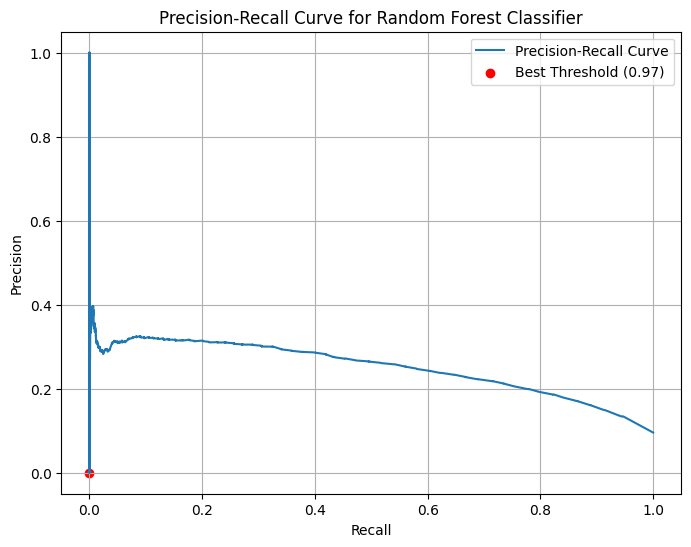

In [128]:
# Predict probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the best threshold based on a metric (e.g., F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold}")

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', marker='o', label=f'Best Threshold ({best_threshold:.2f})')

plt.legend()
plt.grid(True)
plt.show()


## 2. Gradient Boosting Classifier

In [129]:
gboosting = GradientBoostingClassifier(random_state = 10)
gboosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [130]:
gboosting_pred = gboosting.predict(X_test)

In [131]:
conf_matrix = confusion_matrix(y_test, gboosting_pred)
accuracy = accuracy_score(y_test, gboosting_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gboosting_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, gboosting_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, gboosting_pred, zero_division=0))

Confusion Matrix:
 [[68506   318]
 [ 6961   319]]
Accuracy: 0.9043545674340376
Recall Score: 0.9043545674340376
Precision Score: 0.8688302573945498

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68824
           1       0.50      0.04      0.08      7280

    accuracy                           0.90     76104
   macro avg       0.70      0.52      0.52     76104
weighted avg       0.87      0.90      0.87     76104



## 3. Logistic Regression

In [132]:
LR = LogisticRegression(max_iter=1000, random_state= 10)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [133]:
LR_pred = LR.predict(X_test)

In [134]:
conf_matrix_LR = confusion_matrix(y_test, LR_pred)
accuracy_LR = accuracy_score(y_test, LR_pred)
print("Confusion Matrix:\n", conf_matrix_LR)
print("Accuracy:", accuracy_LR)

precision = precision_score(y_test, LR_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, LR_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

Confusion Matrix:
 [[68351   473]
 [ 6832   448]]
Accuracy: 0.9040129296751813
Recall Score: 0.9040129296751813
Precision Score: 0.8686934576423894

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68824
           1       0.32      0.08      0.12      7280

    accuracy                           0.90     76104
   macro avg       0.62      0.53      0.53     76104
weighted avg       0.85      0.90      0.87     76104



## 4. AdaBoost Classifier

In [135]:
# Initialize the model
AdaBoost = AdaBoostClassifier(random_state= 10)

# Fit the model
AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [136]:
# Making Prediction using Test Set
AdaBoost_pred = AdaBoost.predict(X_test)

In [137]:
conf_matrix_AdaBoost = confusion_matrix(y_test, AdaBoost_pred)
accuracy_AdaBoost = accuracy_score(y_test, AdaBoost_pred)
print("Confusion Matrix:\n", conf_matrix_AdaBoost)
print("Accuracy:", accuracy_AdaBoost)

precision_Ada = precision_score(y_test, AdaBoost_pred, average='weighted', zero_division=0)
recall_Ada = recall_score(y_test, AdaBoost_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_Ada)
print("Precision Score:", precision_Ada)

print("\nClassification Report:")
print(classification_report(y_test, AdaBoost_pred, zero_division=0))

Confusion Matrix:
 [[68211   613]
 [ 6717   563]]
Accuracy: 0.9036844318301271
Recall Score: 0.9036844318301271
Precision Score: 0.869066509602749

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     68824
           1       0.48      0.08      0.13      7280

    accuracy                           0.90     76104
   macro avg       0.69      0.53      0.54     76104
weighted avg       0.87      0.90      0.87     76104



## 5. Bagging Classifier

In [138]:
Bagging = BaggingClassifier(random_state = 10)

Bagging.fit(X_train, y_train)

BaggingClassifier(random_state=10)

In [139]:
Bagging_pred = Bagging.predict(X_test)

In [140]:
conf_matrix_Bagging = confusion_matrix(y_test, Bagging_pred)
accuracy_Bagging = accuracy_score(y_test, Bagging_pred)
print("Confusion Matrix:\n", conf_matrix_Bagging)
print("Accuracy:", accuracy_Bagging)

precision_Bag = precision_score(y_test, Bagging_pred, average='weighted', zero_division=0)
recall_Bag = recall_score(y_test, Bagging_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_Bag)
print("Precision Score:", precision_Bag)

print("\nClassification Report:")
print(classification_report(y_test, Bagging_pred, zero_division=0))

Confusion Matrix:
 [[66770  2054]
 [ 6429   851]]
Accuracy: 0.8885341112162304
Recall Score: 0.8885341112162304
Precision Score: 0.8529364906128492

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     68824
           1       0.29      0.12      0.17      7280

    accuracy                           0.89     76104
   macro avg       0.60      0.54      0.55     76104
weighted avg       0.85      0.89      0.87     76104



## 6. Extra Trees Classifier

In [141]:
ExtraTree = ExtraTreesClassifier(random_state = 10)

ExtraTree.fit(X_train, y_train)

ExtraTreesClassifier(random_state=10)

In [142]:
ExtraTree_pred = ExtraTree.predict(X_test)

In [143]:
conf_matrix_ExtraTree = confusion_matrix(y_test, ExtraTree_pred)
accuracy_ExtraTree = accuracy_score(y_test, ExtraTree_pred)
print("Confusion Matrix:\n", conf_matrix_ExtraTree)
print("Accuracy:", accuracy_ExtraTree)

precision_ET = precision_score(y_test, ExtraTree_pred, average='weighted', zero_division=0)
recall_ET = recall_score(y_test, ExtraTree_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_ET)
print("Precision Score:", precision_ET)

print("\nClassification Report:")
print(classification_report(y_test, ExtraTree_pred, zero_division=0))

Confusion Matrix:
 [[66965  1859]
 [ 6544   736]]
Accuracy: 0.8895853043204036
Recall Score: 0.8895853043204036
Precision Score: 0.8509650477826783

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     68824
           1       0.28      0.10      0.15      7280

    accuracy                           0.89     76104
   macro avg       0.60      0.54      0.55     76104
weighted avg       0.85      0.89      0.87     76104



# Handling Class Imbalance Problem with SMOTE

In [144]:
# Checking Class Distribution

print("Class distribution in training set:")
print(y_train.value_counts())

Class distribution in training set:
HeartDiseaseorAttack
0    160963
1     16613
Name: count, dtype: int64


In [145]:
# Balancing the Data

smote = SMOTE(random_state= 10)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

y_train_bal.value_counts()   # Data is now balanced

,count
HeartDiseaseorAttack,
0,160963
1,160963


# Retraining the Models with Balanced Data sets

## Random Forest with Balanced Dataset

In [146]:
rf = RandomForestClassifier(random_state = 20)
rf.fit(X_train_bal, y_train_bal)

rf_pred = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

Confusion Matrix:
 [[65899  2925]
 [ 5940  1340]]
Accuracy: 0.8835146641438032
Recall Score: 0.8835146641438032
Precision Score: 0.8596205641681672

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68824
           1       0.31      0.18      0.23      7280

    accuracy                           0.88     76104
   macro avg       0.62      0.57      0.58     76104
weighted avg       0.86      0.88      0.87     76104



## Gradient Boosting with Balanced Data

In [147]:
gboosting = GradientBoostingClassifier(random_state = 10)
gboosting.fit(X_train_bal, y_train_bal)

gboosting_pred = gboosting.predict(X_test)

conf_matrix = confusion_matrix(y_test, gboosting_pred)
accuracy = accuracy_score(y_test, gboosting_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gboosting_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, gboosting_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, gboosting_pred, zero_division=0))

Confusion Matrix:
 [[61977  6847]
 [ 4106  3174]]
Accuracy: 0.8560785241248817
Recall Score: 0.8560785241248817
Precision Score: 0.8784494968733273

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     68824
           1       0.32      0.44      0.37      7280

    accuracy                           0.86     76104
   macro avg       0.63      0.67      0.64     76104
weighted avg       0.88      0.86      0.87     76104



## Logistic Regression with Balanced Data

In [148]:
LR = LogisticRegression(max_iter=1000, random_state= 20)
LR.fit(X_train_bal, y_train_bal)

LR_pred = LR.predict(X_test)

conf_matrix_LR = confusion_matrix(y_test, LR_pred)
accuracy_LR = accuracy_score(y_test, LR_pred)
print("Confusion Matrix:\n", conf_matrix_LR)
print("Accuracy:", accuracy_LR)

precision = precision_score(y_test, LR_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, LR_pred, average='weighted', zero_division=0)
print("Recall Score:", recall)
print("Precision Score:", precision)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

Confusion Matrix:
 [[49424 19400]
 [ 1537  5743]]
Accuracy: 0.7248896247240618
Recall Score: 0.7248896247240618
Precision Score: 0.8989159088214802

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68824
           1       0.31      0.18      0.23      7280

    accuracy                           0.88     76104
   macro avg       0.62      0.57      0.58     76104
weighted avg       0.86      0.88      0.87     76104



## AdaBoost with Balanced Data

In [149]:
# Initialize the model
AdaBoost = AdaBoostClassifier(random_state= 20)

# Fit the model
AdaBoost.fit(X_train_bal, y_train_bal)

# Making Prediction using Test Set
AdaBoost_pred = AdaBoost.predict(X_test)

conf_matrix_AdaBoost = confusion_matrix(y_test, AdaBoost_pred)
accuracy_AdaBoost = accuracy_score(y_test, AdaBoost_pred)
print("Confusion Matrix:\n", conf_matrix_AdaBoost)
print("Accuracy:", accuracy_AdaBoost)

precision_Ada = precision_score(y_test, AdaBoost_pred, average='weighted', zero_division=0)
recall_Ada = recall_score(y_test, AdaBoost_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_Ada)
print("Precision Score:", precision_Ada)

print("\nClassification Report:")
print(classification_report(y_test, AdaBoost_pred, zero_division=0))

Confusion Matrix:
 [[53430 15394]
 [ 2240  5040]]
Accuracy: 0.7682907600126143
Recall Score: 0.7682907600126143
Precision Score: 0.8915473117138305

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     68824
           1       0.25      0.69      0.36      7280

    accuracy                           0.77     76104
   macro avg       0.60      0.73      0.61     76104
weighted avg       0.89      0.77      0.81     76104



## Bagging with Balanced Data

In [150]:
Bagging = BaggingClassifier(random_state = 10)

Bagging.fit(X_train_bal, y_train_bal)

Bagging_pred = Bagging.predict(X_test)

conf_matrix_Bagging = confusion_matrix(y_test, Bagging_pred)
accuracy_Bagging = accuracy_score(y_test, Bagging_pred)
print("Confusion Matrix:\n", conf_matrix_Bagging)
print("Accuracy:", accuracy_Bagging)

precision_Bag = precision_score(y_test, Bagging_pred, average='weighted', zero_division=0)
recall_Bag = recall_score(y_test, Bagging_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_Bag)
print("Precision Score:", precision_Bag)

print("\nClassification Report:")
print(classification_report(y_test, Bagging_pred, zero_division=0))

Confusion Matrix:
 [[65834  2990]
 [ 6140  1140]]
Accuracy: 0.8800325869862293
Recall Score: 0.8800325869862293
Precision Score: 0.8535978866280042

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     68824
           1       0.28      0.16      0.20      7280

    accuracy                           0.88     76104
   macro avg       0.60      0.56      0.57     76104
weighted avg       0.85      0.88      0.86     76104



## Extra Tree with Balanced Data

In [151]:
ExtraTree = ExtraTreesClassifier(random_state = 10)

ExtraTree.fit(X_train_bal, y_train_bal)

ExtraTree_pred = ExtraTree.predict(X_test)

conf_matrix_ExtraTree = confusion_matrix(y_test, ExtraTree_pred)
accuracy_ExtraTree = accuracy_score(y_test, ExtraTree_pred)
print("Confusion Matrix:\n", conf_matrix_ExtraTree)
print("Accuracy:", accuracy_ExtraTree)

precision_ET = precision_score(y_test, ExtraTree_pred, average='weighted', zero_division=0)
recall_ET = recall_score(y_test, ExtraTree_pred, average='weighted', zero_division=0)
print("Recall Score:", recall_ET)
print("Precision Score:", precision_ET)

print("\nClassification Report:")
print(classification_report(y_test, ExtraTree_pred, zero_division=0))

Confusion Matrix:
 [[64713  4111]
 [ 5579  1701]]
Accuracy: 0.8726742352570167
Recall Score: 0.8726742352570167
Precision Score: 0.8605612533771613

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     68824
           1       0.29      0.23      0.26      7280

    accuracy                           0.87     76104
   macro avg       0.61      0.59      0.60     76104
weighted avg       0.86      0.87      0.87     76104



The initial classifiers trained on imbalanced data demonstrate a high accuracy but often poor recall for the minority class (HeartDiseaseorAttack = 1). This suggests the models learned to predict the majority class well but failed to correctly identify heart disease cases. The application of SMOTE (Synthetic Minority Oversampling Technique) significantly improved the performance of all classifiers by balancing the class distribution. After balancing the dataset, we can see a substantial increase in the recall score for minority class, indicating improved ability to identify heart disease cases.